In [61]:
import pandas as pd

# Diccionario que mapea el nombre del animal con su número
mapa_animales = {
    "Delfin": 76, "Ballena": 77, "Carnero": 1, "Toro": 2, "Ciempies": 3, "Alacran": 4,
    "Leon": 5, "Rana": 6, "Perico": 7, "Raton": 8, "Aguila": 9, "Tigre": 10, "Gato": 11,
    "Caballo": 12, "Mono": 13, "Paloma": 14, "Zorro": 15, "Oso": 16, "Pavo": 17, "Burro": 18,
    "Chivo": 19, "Cochino": 20, "Gallo": 21, "Camello": 22, "Cebra": 23, "Iguana": 24, 
    "Gallina": 25, "Vaca": 26, "Perro": 27, "Zamuro": 28, "Elefante": 29, "Caiman": 30,
    "Lapa": 31, "Ardilla": 32, "Pescado": 33, "Venado": 34, "Jirafa": 35, "Culebra": 36,
    "Tortuga": 37, "Bufalo": 38, "Lechuza": 39, "Avispa": 40, "Canguro": 41, "Tucan": 42,
    "Mariposa": 43, "Chiguire": 44, "Garza": 45, "Puma": 46, "Pavo Real": 47, 
    "Puercoespin": 48, "Pereza": 49, "Canario": 50, "Pelicano": 51, "Pulpo": 52, 
    "Caracol": 53, "Grillo": 54, "Oso Hormiguero": 55, "Tiburon": 56, "Pato": 57, 
    "Hormiga": 58, "Pantera": 59, "Camaleon": 60, "Panda": 61, "Cachicamo": 62, 
    "Cangrejo": 63, "Gavilan": 64, "Arana": 65, "Lobo": 66, "Avestruz": 67, "Jaguar": 68, 
    "Conejo": 69, "Bisonte": 70, "Guacamaya": 71, "Gorila": 72, "Hipopotamo": 73, 
    "Turpial": 74, "Guacharo": 75
}

# Leer el archivo de resultados (se asume que el archivo está en el formato adecuado)
with open("resultados_guacharoactivo_2024.txt", "r", encoding="utf-8") as archivo:
    lineas = archivo.readlines()

# Procesar las líneas para extraer la información
datos = []
for linea in lineas:
    # Filtrar las líneas vacías o irrelevantes
    if linea.strip():
        partes = linea.strip().split(",")
        if len(partes) == 3:
            fecha, hora, animalito = partes
            # Homologar el número del animal según el diccionario
            numero = mapa_animales.get(animalito.strip(), None)
            if numero is not None:
                datos.append([fecha, hora, animalito.strip(), numero])

# Crear el DataFrame con los resultados
df_resultados = pd.DataFrame(datos, columns=["Fecha", "Hora", "Animalito", "Número"])

# Mostrar las primeras filas del DataFrame para verificar
print(df_resultados.head())

# Guardar el DataFrame a un archivo CSV
df_resultados.to_csv("resultados_guacharoactivo_completo.csv", index=False, encoding="utf-8")

print("Datos guardados exitosamente en resultados_guacharoactivo_completo.csv")


        Fecha       Hora Animalito  Número
0  2024-01-02   08:00 AM   Ballena      77
1  2024-01-03   08:00 AM   Pescado      33
2  2024-01-04   08:00 AM   Gallina      25
3  2024-01-05   08:00 AM      Lapa      31
4  2024-01-06   08:00 AM     Panda      61
Datos guardados exitosamente en resultados_guacharoactivo_completo.csv


In [62]:
df_resultados.count()

Fecha        17304
Hora         17304
Animalito    17304
Número       17304
dtype: int64

# RandomForestClassifier

In [63]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
df = pd.read_csv("resultados_guacharoactivo_completo.csv")

# Limpiar los datos si es necesario, eliminando espacios adicionales en la columna 'Hora'
df['Hora'] = df['Hora'].str.strip()

# Convertir la columna 'Fecha' a tipo datetime

df['Fecha'] = pd.to_datetime(df['Fecha'], format='%Y-%m-%d')

# Crear columnas mes y año

df['Mes'] = pd.DatetimeIndex(df['Fecha']).month
df['Año'] = pd.DatetimeIndex(df['Fecha']).year

# Convertir la columna 'Hora' al formato adecuado (extraemos solo la hora en formato 24 horas)
df['Hora'] = pd.to_datetime(df['Hora'], format='%I:%M %p').dt.hour

# Extraer el día de la semana
df['DiaSemana'] = df['Fecha'].dt.dayofweek

# Crear columna de fin de semana (sábado=5, domingo=6)
df['EsFinDeSemana'] = (df['DiaSemana'] >= 5).astype(int)

# Crear tramo horario
def clasificar_tramo(hora):
    if 8 <= hora < 12:
        return 0  # Mañana
    elif 12 <= hora < 16:
        return 1  # Tarde
    else:
        return 2  # Noche

df['TramoHora'] = df['Hora'].apply(clasificar_tramo)

# Definir las características (X) y la variable objetivo (y)

# Convertir Fecha a días desde la base
fecha_base = df['Fecha'].min()
df['FechaDias'] = (df['Fecha'] - fecha_base).dt.days

# Nuevo conjunto de características
X = df[['FechaDias', 'Hora', 'DiaSemana', 'EsFinDeSemana', 'TramoHora', 'Mes', 'Año']]
y = df['Número']  # El objetivo es predecir el nombre del animalito

# Manejar valores NaN
# Eliminar filas con valores NaN (si los hubiera)
X = X.dropna()
y = y[X.index]  # Asegurarse de que `y` corresponda con `X` después de eliminar filas

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [65]:
X_train

,FechaDias,Hora,DiaSemana,EsFinDeSemana,TramoHora,Mes,Año
1675,142,12,3,0,1,5,2024
12445,327,9,6,1,0,11,2024
6994,227,14,4,0,1,8,2024
15580,225,10,2,0,0,8,2024
9180,43,18,2,0,2,2,2024
...,...,...,...,...,...,...,...
11284,223,12,0,0,1,8,2024
11964,280,13,1,0,1,10,2024
5390,95,11,5,1,0,4,2024
860,73,12,4,0,1,3,2024


In [66]:
y_train

1675      7
12445     8
6994     29
15580    24
9180     55
         ..
11284     8
11964     3
5390     54
860      21
15795    34
Name: Número, Length: 13843, dtype: int64

In [67]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluamos el modelo realizando una prediccion
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error (MAPE):", np.mean(np.abs((y_test - y_pred)/y_test))*100)

Mean Squared Error: 10.226813059809304
R^2 Score: 0.9785973628178084
Mean Absolute Error (MAE): 0.21005489742848887
Mean Absolute Percentage Error (MAPE): 8.97222622716015


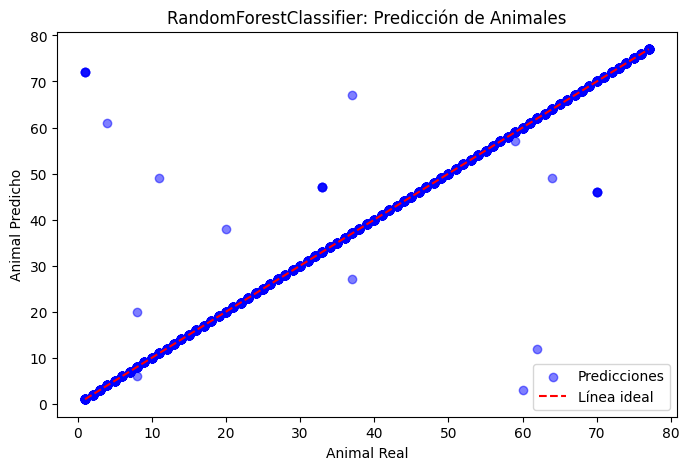

In [68]:
# Gráfico de Regresión, RandomForestRegressor
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predicciones")
plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], color='red', linestyle="--", label="Línea ideal")
plt.xlabel("Animal Real")
plt.ylabel("Animal Predicho")
plt.legend()
plt.title("RandomForestClassifier: Predicción de Animales")
plt.show()

In [69]:
X_test

,FechaDias,Hora,DiaSemana,EsFinDeSemana,TramoHora,Mes,Año
14387,119,18,1,0,2,4,2024
1634,136,18,4,0,2,5,2024
10257,136,19,4,0,2,5,2024
8025,313,17,6,1,2,11,2024
7683,279,17,0,0,2,10,2024
...,...,...,...,...,...,...,...
16882,330,16,2,0,2,11,2024
15272,199,12,4,0,1,7,2024
16308,281,18,2,0,2,10,2024
5422,92,16,2,0,2,4,2024


In [70]:
estimator_range = range(10, 310, 10)
accuracy_scores = []

X_sample = X.sample(frac=1, random_state=1)  
y_sample = y.loc[X_sample.index]

for estimator in estimator_range:
    clf = RandomForestClassifier(n_estimators=estimator, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X_sample, y_sample, cv=5, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

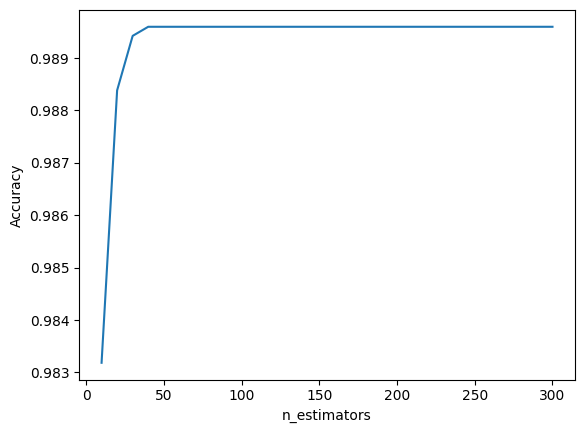

In [71]:
# Gráfica del desempeño del modelo vs la cantidad de max_features
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

In [72]:
feature_cols = df.drop(['Animalito', 'Número'], axis=1).columns

# Creación de lista de valores para iterar sobre diferentes valores de max_features
feature_range = range(1, len(feature_cols)+1)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de max_features
accuracy_scores = []

# Uso de un 10-fold cross-validation para cada valor de max_features
for feature in feature_range:
    clf = RandomForestClassifier(n_estimators=50, max_features=feature, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

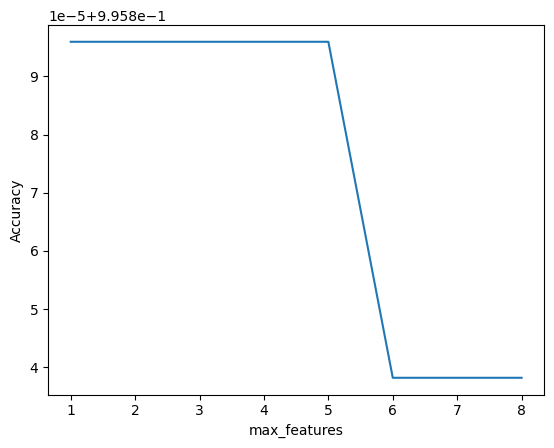

In [73]:
# Gráfica del desempeño del modelo vs la cantidad de max_features
plt.plot(feature_range, accuracy_scores)
plt.xlabel('max_features')
plt.ylabel('Accuracy')

In [74]:
X

,FechaDias,Hora,DiaSemana,EsFinDeSemana,TramoHora,Mes,Año
0,0,8,1,0,0,1,2024
1,1,8,2,0,0,1,2024
2,2,8,3,0,0,1,2024
3,3,8,4,0,0,1,2024
4,4,8,5,1,0,1,2024
...,...,...,...,...,...,...,...
17299,364,19,1,0,2,12,2024
17300,366,19,3,0,2,1,2025
17301,367,19,4,0,2,1,2025
17302,368,19,5,1,2,1,2025


In [75]:
y

0        77
1        33
2        25
3        31
4        61
         ..
17299     9
17300    31
17301    70
17302    37
17303    50
Name: Número, Length: 17304, dtype: int64

In [76]:
clf = RandomForestClassifier(n_estimators=150, max_features=1, random_state=42, n_jobs=-1)
clf.fit(X, y)

RandomForestClassifier(max_features=1, n_estimators=150, n_jobs=-1,
                       random_state=42)

In [77]:
y_pred = clf.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error (MAPE):", np.mean(np.abs((y_test - y_pred)/y_test))*100, "%")

Mean Squared Error: 0.0
R^2 Score: 1.0
Mean Absolute Error (MAE): 0.0
Mean Absolute Percentage Error (MAPE): 0.0 %


In [87]:
def make_custom_prediction(date):
    formated_date = pd.to_datetime(date, format='%Y-%m-%d')
    date_in_days = (formated_date - fecha_base).days
    dia_semana = formated_date.dayofweek
    es_fin_semana = int(dia_semana >= 5)
    mes = formated_date.month
    anio = formated_date.year

    hours = list(range(8, 20))  # De 8 a 19

    # Construimos DataFrame para cada hora
    tramo_hora = [clasificar_tramo(hora) for hora in hours]

    data = {
        'FechaDias': [date_in_days] * len(hours),
        'Hora': hours,
        'DiaSemana': [dia_semana] * len(hours),
        'EsFinDeSemana': [es_fin_semana] * len(hours),
        'TramoHora': tramo_hora,
        'Mes': [mes] * len(hours),
        'Año': [anio] * len(hours)
    }


    nuevo_x = pd.DataFrame(data)

    prediction = clf.predict(nuevo_x)  # <-- asegurarse de usar clf

    # Mapeo inverso
    numero_a_animal = {v: k for k, v in mapa_animales.items()}

    tem_list = []
    for animal in prediction:
        animal_name = numero_a_animal.get(animal, "Desconocido")
        tem_list.append(animal_name)
        if len(tem_list) == 4:
            print(tem_list)
            tem_list = []
    print(data)


In [86]:
def top_4_por_hora(date):
    formated_date = pd.to_datetime(date, format='%Y-%m-%d')
    date_in_days = (formated_date - fecha_base).days
    dia_semana = formated_date.dayofweek
    es_fin_semana = int(dia_semana >= 5)
    mes = formated_date.month
    anio = formated_date.year

    hours = list(range(8, 20))  # De 8am a 7pm
    tramo_hora = [clasificar_tramo(hora) for hora in hours]

    # Crear DataFrame con todas las características necesarias

    data = {
        'FechaDias': [date_in_days] * len(hours),
        'Hora': hours,
        'DiaSemana': [dia_semana] * len(hours),
        'EsFinDeSemana': [es_fin_semana] * len(hours),
        'TramoHora': tramo_hora,
        'Mes': [mes] * len(hours),
        'Año': [anio] * len(hours)
    }

    nuevo_x = pd.DataFrame(data)

    # Predecir probabilidades
    probas = clf.predict_proba(nuevo_x)

    # Mapeo de número a nombre de animal
    numero_a_animal = {v: k for k, v in mapa_animales.items()}

    for i, prob in enumerate(probas):
        top_n_indices = prob.argsort()[-4:][::-1]
        top_animals = [numero_a_animal[clf.classes_[idx]] for idx in top_n_indices]

        if i % 4 == 0:
            print(f"\n--- Bloque de horas {hours[i]} a {hours[min(i+3, len(hours)-1)]} ---")
        print(f"{hours[i]}:00 → {top_animals}")


In [89]:
make_custom_prediction('2025-04-09')

['Leon', 'Gato', 'Rana', 'Guacamaya']
['Oso', 'Cochino', 'Avestruz', 'Tucan']
['Bufalo', 'Ciempies', 'Alacran', 'Bisonte']
{'FechaDias': [463, 463, 463, 463, 463, 463, 463, 463, 463, 463, 463, 463], 'Hora': [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'DiaSemana': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'EsFinDeSemana': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'TramoHora': [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], 'Mes': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 'Año': [2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025]}


In [90]:
top_4_por_hora('2025-04-09')


--- Bloque de horas 8 a 11 ---
8:00 → ['Leon', 'Pereza', 'Tortuga', 'Bufalo']
9:00 → ['Hipopotamo', 'Gato', 'Leon', 'Pereza']
10:00 → ['Rana', 'Jirafa', 'Ardilla', 'Pereza']
11:00 → ['Guacamaya', 'Panda', 'Garza', 'Rana']

--- Bloque de horas 12 a 15 ---
12:00 → ['Oso', 'Pantera', 'Rana', 'Cochino']
13:00 → ['Cochino', 'Pato', 'Pantera', 'Garza']
14:00 → ['Avestruz', 'Raton', 'Bufalo', 'Gato']
15:00 → ['Tucan', 'Avestruz', 'Bufalo', 'Raton']

--- Bloque de horas 16 a 19 ---
16:00 → ['Bufalo', 'Gallo', 'Caiman', 'Ciempies']
17:00 → ['Ciempies', 'Turpial', 'Bufalo', 'Aguila']
18:00 → ['Alacran', 'Vaca', 'Ciempies', 'Puma']
19:00 → ['Bisonte', 'Lapa', 'Canario', 'Hormiga']


In [92]:
make_custom_prediction('2025-04-10')

['Leon', 'Gato', 'Rana', 'Guacamaya']
['Pantera', 'Cochino', 'Avestruz', 'Tucan']
['Bufalo', 'Ciempies', 'Alacran', 'Bisonte']
{'FechaDias': [464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464], 'Hora': [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'DiaSemana': [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], 'EsFinDeSemana': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'TramoHora': [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], 'Mes': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 'Año': [2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025]}


In [91]:
top_4_por_hora('2025-04-10')


--- Bloque de horas 8 a 11 ---
8:00 → ['Leon', 'Pereza', 'Tiburon', 'Gato']
9:00 → ['Gato', 'Hipopotamo', 'Panda', 'Conejo']
10:00 → ['Rana', 'Jirafa', 'Lapa', 'Panda']
11:00 → ['Guacamaya', 'Panda', 'Rana', 'Conejo']

--- Bloque de horas 12 a 15 ---
12:00 → ['Pantera', 'Oso', 'Perico', 'Cochino']
13:00 → ['Cochino', 'Pato', 'Grillo', 'Pantera']
14:00 → ['Avestruz', 'Raton', 'Camello', 'Caballo']
15:00 → ['Tucan', 'Avestruz', 'Raton', 'Iguana']

--- Bloque de horas 16 a 19 ---
16:00 → ['Bufalo', 'Gallo', 'Ciempies', 'Cangrejo']
17:00 → ['Ciempies', 'Turpial', 'Bufalo', 'Mono']
18:00 → ['Alacran', 'Vaca', 'Ciempies', 'Tigre']
19:00 → ['Bisonte', 'Lapa', 'Canario', 'Alacran']
